In [45]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import random

NORMAL_OUTPUT_VALUE = 0
PNEUMONIA_OUTPUT_VALUE = 1
SEED = 2
WIDTH=56
random.seed(SEED)

In [46]:
def sigmoid(x):
    """
    Compute the sigmoid of x

    Arguments:
    x - A scalar or numpy array of any size.

    Return:
    s - sigmoid(x)
    """
    s = 1/(1+np.exp(-x))
    return s

In [47]:
def relu(x):
    """
    Compute the relu of x

    Arguments:
    x - A scalar or numpy array of any size.

    Return:
    s - relu(x)
    """
    s = np.maximum(0,x)
    
    return s


In [48]:
def load_dataset():
    """
    Collect all the paths of the scaled images and load them into the program
    as numpy arrays.

    Hint: The original images from https://www.kaggle.com/datasets/tolgadincer/labeled-chest-xray-images
    have been downscaled with the sperate python script 'PythonImageScaler.py'

    Returns:
    train_X - All training images
    train_Y - All true outputs of all training images
    test_X - All test images
    test_Y - All true outputs of all test images

    """

    # Define the root directories of the train and test sets.
    scaled_train_dir = "scaled2_chest_xray/train/"
    scaled_test_dir = "scaled2_chest_xray/test/"

    # Define the root directories of the normal and pneumonia 
    # test and trainsets.
    scaled_train_pneu = os.listdir(os.path.join(scaled_train_dir, 'PNEUMONIA'))
    scaled_train_normal = os.listdir(os.path.join(scaled_train_dir, 'NORMAL'))
    scaled_test_pneu = os.listdir(os.path.join(scaled_test_dir, 'PNEUMONIA'))
    scaled_test_normal = os.listdir(os.path.join(scaled_test_dir, 'NORMAL'))

    # Collect all paths from the training images and test images
    # and combine these with the true output value (either 
    # NORMAL_OUTPUT_VALUE or PNEUMONIA_OUTPUT_VALUE)
    train_set_image_paths = [('PNEUMONIA/' + name, PNEUMONIA_OUTPUT_VALUE) for name in scaled_train_pneu] + [('NORMAL/' + name, NORMAL_OUTPUT_VALUE) for name in scaled_train_normal]
    test_set_image_paths = [('PNEUMONIA/' + name, PNEUMONIA_OUTPUT_VALUE) for name in scaled_test_pneu] + [('NORMAL/' + name, NORMAL_OUTPUT_VALUE) for name in scaled_test_normal]

    # Shuffle the lists
    random.shuffle(train_set_image_paths) 
    random.shuffle(test_set_image_paths) 

    # Open all image paths and read all the grayscale data from every
    # grayscale image. 
    # ".convert('L')" makes sure that the image is
    # definitely a grayscale, since some images have a few rgb
    # values within the image, which caused problems.
    test_X_list = [list(Image.open(scaled_test_dir + image_path).getdata().convert('L')) for image_path, i in test_set_image_paths]
    train_X_list = [list(Image.open(scaled_train_dir + image_path).getdata().convert('L')) for image_path, i in train_set_image_paths]

    # Downscale the grayscale value for a pixel from [0;255] to [0;1]
    test_X_list = [[float(value)/255 for value in image_data] for image_data in test_X_list]
    train_X_list = [[float(value)/255 for value in image_data] for image_data in train_X_list]

    # Convert both  the test and train lists to actual numpy arrays
    train_X = np.array(train_X_list, dtype=float).T
    test_X = np.array(test_X_list, dtype=float).T
    train_Y = np.array([[float(i) for image_path, i in train_set_image_paths]], dtype=float)
    test_Y = np.array([[float(i) for image_path, i in test_set_image_paths]], dtype=float)

    return (train_X, train_Y, test_X, test_Y)

[[0.12156863 0.47843137 0.         ... 0.01960784 0.04705882 0.45098039]
 [0.13333333 0.37647059 0.03137255 ... 0.61176471 0.         0.61176471]
 [0.13333333 0.3254902  0.         ... 0.58039216 0.43137255 0.58431373]
 ...
 [0.15686275 0.07058824 0.         ... 0.1254902  0.         0.22352941]
 [0.15294118 0.09019608 0.01960784 ... 0.14509804 0.         0.        ]
 [0.14901961 0.10196078 0.         ... 0.11764706 0.01960784 0.02745098]]
[[0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
  0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0.
  0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1.
  1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0.
  0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0.
  0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0.
  0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 

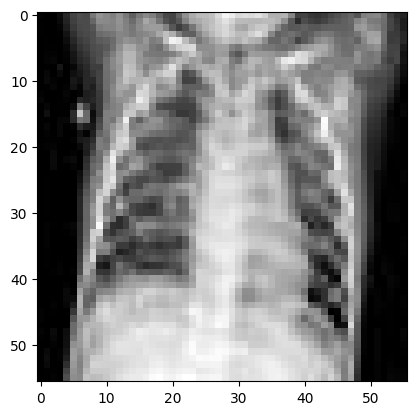

In [49]:
train_X, train_Y, test_X, test_Y = load_dataset()
#print(train_X[0:3])
#print(train_Y)
print(test_X)
print(test_Y)
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

index = 10
plt.imshow(test_X.T[index].reshape(WIDTH, WIDTH), cmap='gray')

In [50]:
def initialize_parameters(layer_dims):
    """
    Initialize all parameters of the neural network based on each layer dimension given
    in layer_dims. 

    Arguments:
    layer_dims - python array (list) containing the dimensions of each layer in the network
    
    Returns:
    parameters - python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
        W1 - weight matrix of shape (layer_dims[l], layer_dims[l-1])
        b1 - bias vector of shape (layer_dims[l], 1)
        Wl - weight matrix of shape (layer_dims[l-1], layer_dims[l])
        bl - bias vector of shape (1, layer_dims[l])
    """
    
    np.random.seed(SEED)
    parameters = {}
    # Number of layers in the network
    number_of_layers = len(layer_dims)
    
    # Generate the all weight and biases matrices for the
    # Neural Network based of the values and number of values
    # in layer_dims
    print("Generating a network with the following shapes of the weights and biases:")
    for layer in range(1, number_of_layers):
        parameters['W' + str(layer)] = np.random.randn(layer_dims[layer], layer_dims[layer-1])*0.01
        parameters['b'  + str(layer)] = np.zeros((layer_dims[layer], 1))
        
        # Print all shapes from all parameters
        print("{}:{}".format('W' + str(layer), parameters['W' + str(layer)].shape))
        print("{}:{}".format('b' + str(layer), parameters['b' + str(layer)].shape))

        assert(parameters['W' + str(layer)].shape == (layer_dims[layer], layer_dims[layer-1]))
        assert(parameters['b'  + str(layer)].shape == (layer_dims[layer], 1))
        
    return parameters

In [69]:
def forward_propagation(X, parameters):
    """
    Propagate input features through the neural network.
    
    Argument:
    X - Input features
    parameters - Python dictionary containing all parameters (output of initialization function)
    
    Returns:
    A2 - The sigmoid output of the last activation layer
    cache - a dictionary containing all values of "A1", "Z1, ... "AL", "ZL"
    """
    
    cache = {}
    # Number of layers in the network
    number_of_layers = int(len(parameters)/2)-1
    last_A = X
    for layer in range(1, number_of_layers+1):
        # Calculate Z and A of current layer
        Z = np.matmul(parameters['W'+ str(layer)], last_A) + parameters['b' + str(layer)]
        A = relu(Z)
        # Update cache with Z and A from current layer
        cache.update({'Z' + str(layer): Z})
        cache.update({'A' + str(layer): A})
        # Temporaily save A to use in the next iteration
        last_A = A 

    Z = np.matmul(parameters['W' + str(number_of_layers+1)], last_A) + parameters['b' + str(number_of_layers+1)]
    A = sigmoid(Z)
    cache.update({'Z' + str(number_of_layers+1): Z})
    cache.update({'A' + str(number_of_layers+1): A})
    
    assert(A.shape == (1, X.shape[1]))
    
    return A, cache

In [70]:
def forward_propagation_with_dropout(X, parameters, keep_probability = 0.5):
    """
    Propagate input features through the neural network.
    
    Argument:
    X - Input features
    parameters - Python dictionary containing all parameters (output of initialization function)
    
    Returns:
    A2 - The sigmoid output of the last activation layer
    cache - a dictionary containing all values of "A1", "Z1, ... "AL", "ZL"
    """
    
    cache = {}
    # Number of layers in the network
    number_of_layers = int(len(parameters)/2)-1
    last_A = X
    for layer in range(1, number_of_layers+1):
        # Calculate Z and A of current layer
        Z = np.matmul(parameters['W'+ str(layer)], last_A) + parameters['b' + str(layer)]
        A = relu(Z)
        # Droput
        D = np.random.rand(A.shape[0], A.shape[1])
        D = (D < keep_probability).astype(int)
        A = A * D
        A = A / keep_probability
        # Update cache with D, Z and A from current layer
        cache.update({'D' + str(layer): D})
        cache.update({'Z' + str(layer): Z})
        cache.update({'A' + str(layer): A})
        # Temporaily save A to use in the next iteration
        last_A = A 

    Z = np.matmul(parameters['W' + str(number_of_layers+1)], last_A) + parameters['b' + str(number_of_layers+1)]
    A = sigmoid(Z)
    cache.update({'Z' + str(number_of_layers+1): Z})
    cache.update({'A' + str(number_of_layers+1): A})
    
    assert(A.shape == (1, X.shape[1]))
    
    return A, cache

In [71]:
def compute_cost(A, Y):
    """
    Computes the cross-entropy cost given in equation (13)
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    cost -- cross-entropy cost given equation (13)
    
    """
    m = Y.shape[1] # number of example

    # Compute the cross-entropy cost
    epsilon = 1e-7
    cost = -(1/m)* float(np.dot(Y, np.log(A.T + epsilon)) + np.dot(1-Y,np.log(1-A.T + epsilon)))
    
    assert(isinstance(cost, float))

    return cost

In [72]:
def compute_cost_with_regularization(A, Y, parameters, lambd):
    """
    Implement the cost function with L2 regularization. See formula (2) above.
    
    Arguments:
    A3 -- post-activation, output of forward propagation, of shape (output size, number of examples)
    Y -- "true" labels vector, of shape (output size, number of examples)
    parameters -- python dictionary containing parameters of the model
    
    Returns:
    cost - value of the regularized loss function (formula (2))
    """
    m = Y.shape[1]
    
    # This gives you the cross-entropy part of the cost
    cross_entropy_cost = compute_cost(A, Y)

    ### START CODE HERE ### (approx. 2 line)
    number_of_layers = int(len(parameters)/2)-1

    sum_of_all_weights = 0.0
    for layer in range(1, number_of_layers+1):
        sum_of_all_weights = sum_of_all_weights + np.sum(np.square(parameters['W' + str(layer)]))

    L2_regularization_cost = lambd/(2*m) * sum_of_all_weights
    cost = cross_entropy_cost + L2_regularization_cost
    ### END CODER HERE ###

    return cost

In [73]:
def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    # Retrieve also A1 and A2 from dictionary "cache".
    # Backward propagation: calculate dW1, db1, dW2, db2. 

    ### START CODE HERE ### (≈ 3 (retrieve) + 6 (back prop) lines of code)
    grads = {}
    number_of_layers = int(len(parameters)/2)-1

    dZ = cache['A' + str(number_of_layers+1)] - Y
    dW = (1/m)*np.matmul(dZ,cache['A' + str(number_of_layers)].T)
    db = (1/m)*np.sum(dZ, axis=1, keepdims = True)
    grads.update({'dW' + str(number_of_layers+1): dW})
    grads.update({'db' + str(number_of_layers+1): db})

    last_dZ = dZ
    for layer in range(number_of_layers, 1, -1):
        dZ = np.matmul(parameters['W' + str(layer+1)].T,last_dZ)* np.heaviside(cache['A' + str(layer)], 1)
        dW = (1/m)*np.matmul(dZ,cache['A' + str(layer-1)].T)
        db = (1/m)*np.sum(dZ, axis=1, keepdims = True)
        grads.update({'dW' + str(layer): dW})
        grads.update({'db' + str(layer): db})
        last_dZ = dZ 
    
    dZ1 = np.matmul(parameters['W2'].T,last_dZ)* np.heaviside(cache['A1'], 1)
    dW1 = (1/m)*np.matmul(dZ1,X.T)
    db1 = (1/m)*np.sum(dZ1, axis=1, keepdims = True)
    grads.update({'dW1': dW1})
    grads.update({'db1': db1})
    
    return grads

In [74]:
def backward_propagation_with_regularization(parameters, cache, X, Y, lambd):
    """
    Implements the backward propagation of our baseline model to which we added an L2 regularization.
    
    Arguments:
    X -- input dataset, of shape (input size, number of examples)
    Y -- "true" labels vector, of shape (output size, number of examples)
    cache -- cache output from forward_propagation()
    lambd -- regularization hyperparameter, scalar
    
    Returns:
    gradients -- A dictionary with the gradients with respect to each parameter, activation and pre-activation variables
    """
    
    m = X.shape[1]
    grads = {}
    number_of_layers = int(len(parameters)/2)-1

    dZ = cache['A' + str(number_of_layers+1)] - Y
    dW = (1/m)*(np.matmul(dZ,cache['A' + str(number_of_layers)].T)+lambd*parameters['W' + str(number_of_layers+1)])
    db = (1/m)*np.sum(dZ, axis=1, keepdims = True)
    grads.update({'dW' + str(number_of_layers+1): dW})
    grads.update({'db' + str(number_of_layers+1): db})

    last_dZ = dZ
    for layer in range(number_of_layers, 1, -1):
        dZ = np.matmul(parameters['W' + str(layer+1)].T,last_dZ)* np.heaviside(cache['A' + str(layer)], 1)
        dW = (1/m)*(np.matmul(dZ,cache['A' + str(layer-1)].T)+lambd*parameters['W' + str(layer)])
        db = (1/m)*np.sum(dZ, axis=1, keepdims = True)    #(1,1)
        grads.update({'dW' + str(layer): dW})
        grads.update({'db' + str(layer): db})
        last_dZ = dZ 
    
    dZ1 = np.matmul(parameters['W2'].T,last_dZ)* np.heaviside(cache['A1'], 1)
    dW1 = (1/m)*(np.matmul(dZ1,X.T)+lambd*parameters['W1'])
    db1 = (1/m)*np.sum(dZ1, axis=1, keepdims = True)
    grads.update({'dW1': dW1})
    grads.update({'db1': db1})
    
    return grads

In [75]:
def backward_propagation_with_dropout(parameters, cache, X, Y, keep_probability):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    # Retrieve also A1 and A2 from dictionary "cache".
    # Backward propagation: calculate dW1, db1, dW2, db2. 

    ### START CODE HERE ### (≈ 3 (retrieve) + 6 (back prop) lines of code)
    grads = {}
    number_of_layers = int(len(parameters)/2)-1

    dZ = cache['A' + str(number_of_layers+1)] - Y
    dW = (1/m)*np.matmul(dZ,cache['A' + str(number_of_layers)].T)
    db = (1/m)*np.sum(dZ, axis=1, keepdims = True)
    grads.update({'dW' + str(number_of_layers+1): dW})
    grads.update({'db' + str(number_of_layers+1): db})

    last_dZ = dZ
    for layer in range(number_of_layers, 1, -1):
        dA = np.matmul(parameters['W' + str(layer+1)].T,last_dZ)
        dA = dA * cache["D" + str(layer)]
        dA = dA / keep_probability
        dZ = dA * np.heaviside(cache['A' + str(layer)], 1)
        dW = (1/m)*np.matmul(dZ,cache['A' + str(layer-1)].T)
        db = (1/m)*np.sum(dZ, axis=1, keepdims = True)
        grads.update({'dW' + str(layer): dW})
        grads.update({'db' + str(layer): db})
        last_dZ = dZ 
    
    dA = np.matmul(parameters['W2'].T,last_dZ)
    dA = dA * cache["D1"]
    dA = dA / keep_probability
    dZ1 = dA * np.heaviside(cache['A1'], 1)
    dW1 = (1/m)*np.matmul(dZ1,X.T)
    db1 = (1/m)*np.sum(dZ1, axis=1, keepdims = True)
    grads.update({'dW1': dW1})
    grads.update({'db1': db1})
    
    return grads

In [76]:
def update_parameters(parameters, grads, learning_rate):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters" and "grads"
    # Update rule for each parameter
    number_of_layers = int(len(parameters)/2)-1
    for layer in range(1, number_of_layers+1):
        parameters['W'+str(layer)] = parameters['W'+str(layer)] - learning_rate*grads['dW'+str(layer)]
        parameters['b'+str(layer)] = parameters['b'+str(layer)] - learning_rate*grads['db'+str(layer)]

    return parameters

In [77]:
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    ### START CODE HERE ### (≈ 2 lines of code)
    A2, cache = forward_propagation(X, parameters)
    predictions = np.heaviside(A2-0.5, 1)
    ### END CODE HERE ###
    
    return predictions

In [78]:
def calculate_train_accuracy(parameters):
    predictions = predict(parameters, train_X)
    return float((np.dot(train_Y,predictions.T) + np.dot(1-train_Y,1-predictions.T))/float(train_Y.size)*100)

In [79]:
def calculate_test_accuracy(parameters):
    predictions = predict(parameters, test_X)
    return float((np.dot(test_Y,predictions.T) + np.dot(1-test_Y,1-predictions.T))/float(test_Y.size)*100)

In [80]:
def nn_model(X, Y, layer_dims, learning_rate, lambd, keep_probability, num_iterations, print_cost=False, print_graph = False, regularization = False, dropout = False):
    costs=[]
    train_accuracy_values = []
    test_accuracy_values = []

    parameters = initialize_parameters(layer_dims)
    print("\nStart training:")
    for i in range(num_iterations):
        if dropout:
            A, cache = forward_propagation_with_dropout(X, parameters, keep_probability)
        else:
            A, cache = forward_propagation(X, parameters)
        cost = 0
        if regularization:
            cost = compute_cost_with_regularization(A, Y, parameters, lambd)
        else:
            cost = compute_cost(A, Y)
        costs.append(cost)
        if print_cost == True:
            if (i+1) % 1 == 0:
                print("Cost after iteration {}: {:.2e}".format(i+1, cost))

        grads = {}
        if regularization:
            grads = backward_propagation_with_regularization(parameters, cache, X, Y, lambd)
        elif dropout:
            grads = backward_propagation_with_dropout(parameters, cache, X, Y, keep_probability)
        else:
            grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads, learning_rate)

        if print_graph:
            train_accuracy_values.append(calculate_train_accuracy(parameters))
            test_accuracy_values.append(calculate_test_accuracy(parameters))

    
    return (parameters, costs, train_accuracy_values, test_accuracy_values)

In [84]:
layer_dims = [train_X.shape[0], 256, 128, 64, train_Y.shape[0]]
learning_rate = 0.2
lambd = 0.7
keep_probability = 0.5
number_of_iterations = 3000
print_cost = True
print_graph = True
regularization = False
dropout = True

# Build a model with a n_h-dimensional hidden layer
parameters, costs, train_accuracy_values, test_accuracy_values = nn_model(
    X=train_X, 
    Y=train_Y, 
    layer_dims=layer_dims, 
    learning_rate=learning_rate, 
    lambd=lambd,
    keep_probability = keep_probability,
    num_iterations = number_of_iterations, 
    print_cost=print_cost, 
    print_graph=print_graph, 
    regularization=regularization,
    dropout=dropout
)

plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations: {}'.format(str(number_of_iterations)))
title_string = "alpha: {}; layers: {};".format(str(learning_rate), str(layer_dims))
if regularization:
    title_string = title_string + " lambda: {};".format(str(lambd))
if dropout:
    title_string = title_string + " keep probability: {};".format(str(keep_probability))

plt.title(title_string)
plt.grid(True)
plt.show()

if print_graph:
    plt.plot(train_accuracy_values, label='train accuracy')
    plt.plot(test_accuracy_values, label='test accuracy')
    plt.ylabel('cost')
    plt.xlabel('iterations: {}'.format(str(number_of_iterations)))
    plt.title("train accuracy and test accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

Generating a network with the following shapes of the weights and biases:
W1:(256, 3136)
b1:(256, 1)
W2:(128, 256)
b2:(128, 1)
W3:(64, 128)
b3:(64, 1)
W4:(1, 64)
b4:(1, 1)

Start training:
Cost after iteration 1: 6.93e-01
Cost after iteration 2: 6.93e-01
Cost after iteration 3: 6.93e-01
Cost after iteration 4: 6.93e-01
Cost after iteration 5: 6.93e-01
Cost after iteration 6: 6.93e-01
Cost after iteration 7: 6.93e-01
Cost after iteration 8: 6.93e-01
Cost after iteration 9: 6.93e-01
Cost after iteration 10: 6.93e-01
Cost after iteration 11: 6.93e-01
Cost after iteration 12: 6.93e-01
Cost after iteration 13: 6.93e-01
Cost after iteration 14: 6.93e-01
Cost after iteration 15: 6.93e-01
Cost after iteration 16: 6.93e-01
Cost after iteration 17: 6.92e-01
Cost after iteration 18: 6.92e-01
Cost after iteration 19: 6.92e-01
Cost after iteration 20: 6.92e-01
Cost after iteration 21: 6.92e-01
Cost after iteration 22: 6.92e-01
Cost after iteration 23: 6.92e-01
Cost after iteration 24: 6.92e-01
Cost